# Spotify Music Data Analysis and Recommendation System

### Import Libraries and Data Set 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

from datetime import datetime


%matplotlib inline

In [2]:
df = pd.read_csv("../datasets/data_cleaned.csv", parse_dates=['release_date'], index_col=['release_date'])
df.head()

acousticness                    artists  danceability  energy  \
release_date                                                                  
1920-01-01        0.991000            ['Mamie Smith']         0.598   0.224   
1920-01-05        0.643000  ["Screamin' Jay Hawkins"]         0.852   0.517   
1920-01-01        0.993000            ['Mamie Smith']         0.647   0.186   
1920-01-01        0.000173        ['Oscar Velazquez']         0.730   0.798   
1920-10-01        0.295000                   ['Mixe']         0.704   0.707   

              explicit                      id  instrumentalness  key  \
release_date                                                            
1920-01-01           0  0cS0A1fUEUd1EW3FcF8AEI          0.000522    5   
1920-01-05           0  0hbkKFIJm7Z05H8Zl9w30f          0.026400    5   
1920-01-01           0  11m7laMUgmOKqI3oYzuhne          0.000018    0   
1920-01-01           0  19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2   
1920-10-01           1  2hJjbsLCytGsnAHfdsLejp          0.000246   10   

              liveness  loudness  mode  \
release_date                             
1920-01-01      0.3790   -12.628     0   
1920-01-05      0.0809    -7.261     0   
1920-01-01      0.5190   -12.098     1   
1920-01-01      0.1280    -7.311     1   
1920-10-01      0.4020    -6.036     0   

                                                           name  popularity  \
release_date                                                                  
1920-01-01                             Keep A Song In Your Soul        0.12   
1920-01-05                                 I Put A Spell On You        0.07   
1920-01-01                                         Golfing Papa        0.04   
1920-01-01    True House Music - Xavier Santos & Carlos Gomi...        0.17   
1920-10-01                                            Xuniverxe        0.02   

              speechiness    tempo  valence  year  duration_mins  
release_date                                                      
1920-01-01         0.0936  149.976   0.6340  1920           2.81  
1920-01-05         0.0534   86.889   0.9500  1920           2.50  
1920-01-01         0.1740   97.600   0.6890  1920           2.73  
1920-01-01         0.0425  127.997   0.0422  1920           7.03  
1920-10-01         0.0768  122.076   0.2990  1920           2.75

In [3]:
df.shape

(159334, 18)

# 3. Exploratory Data Analysis

### Correlation Heatmap

In [4]:
plt.style.use('dark_background')

plt.rcParams.update({
    "lines.color": '#1DB954',
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black",
    "font.family": "Calibri"})

In [5]:
numerical_variables = ['popularity', 'acousticness', 'danceability', 'duration_mins', 'energy', 'instrumentalness', 'key', 
                       'mode', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'year']

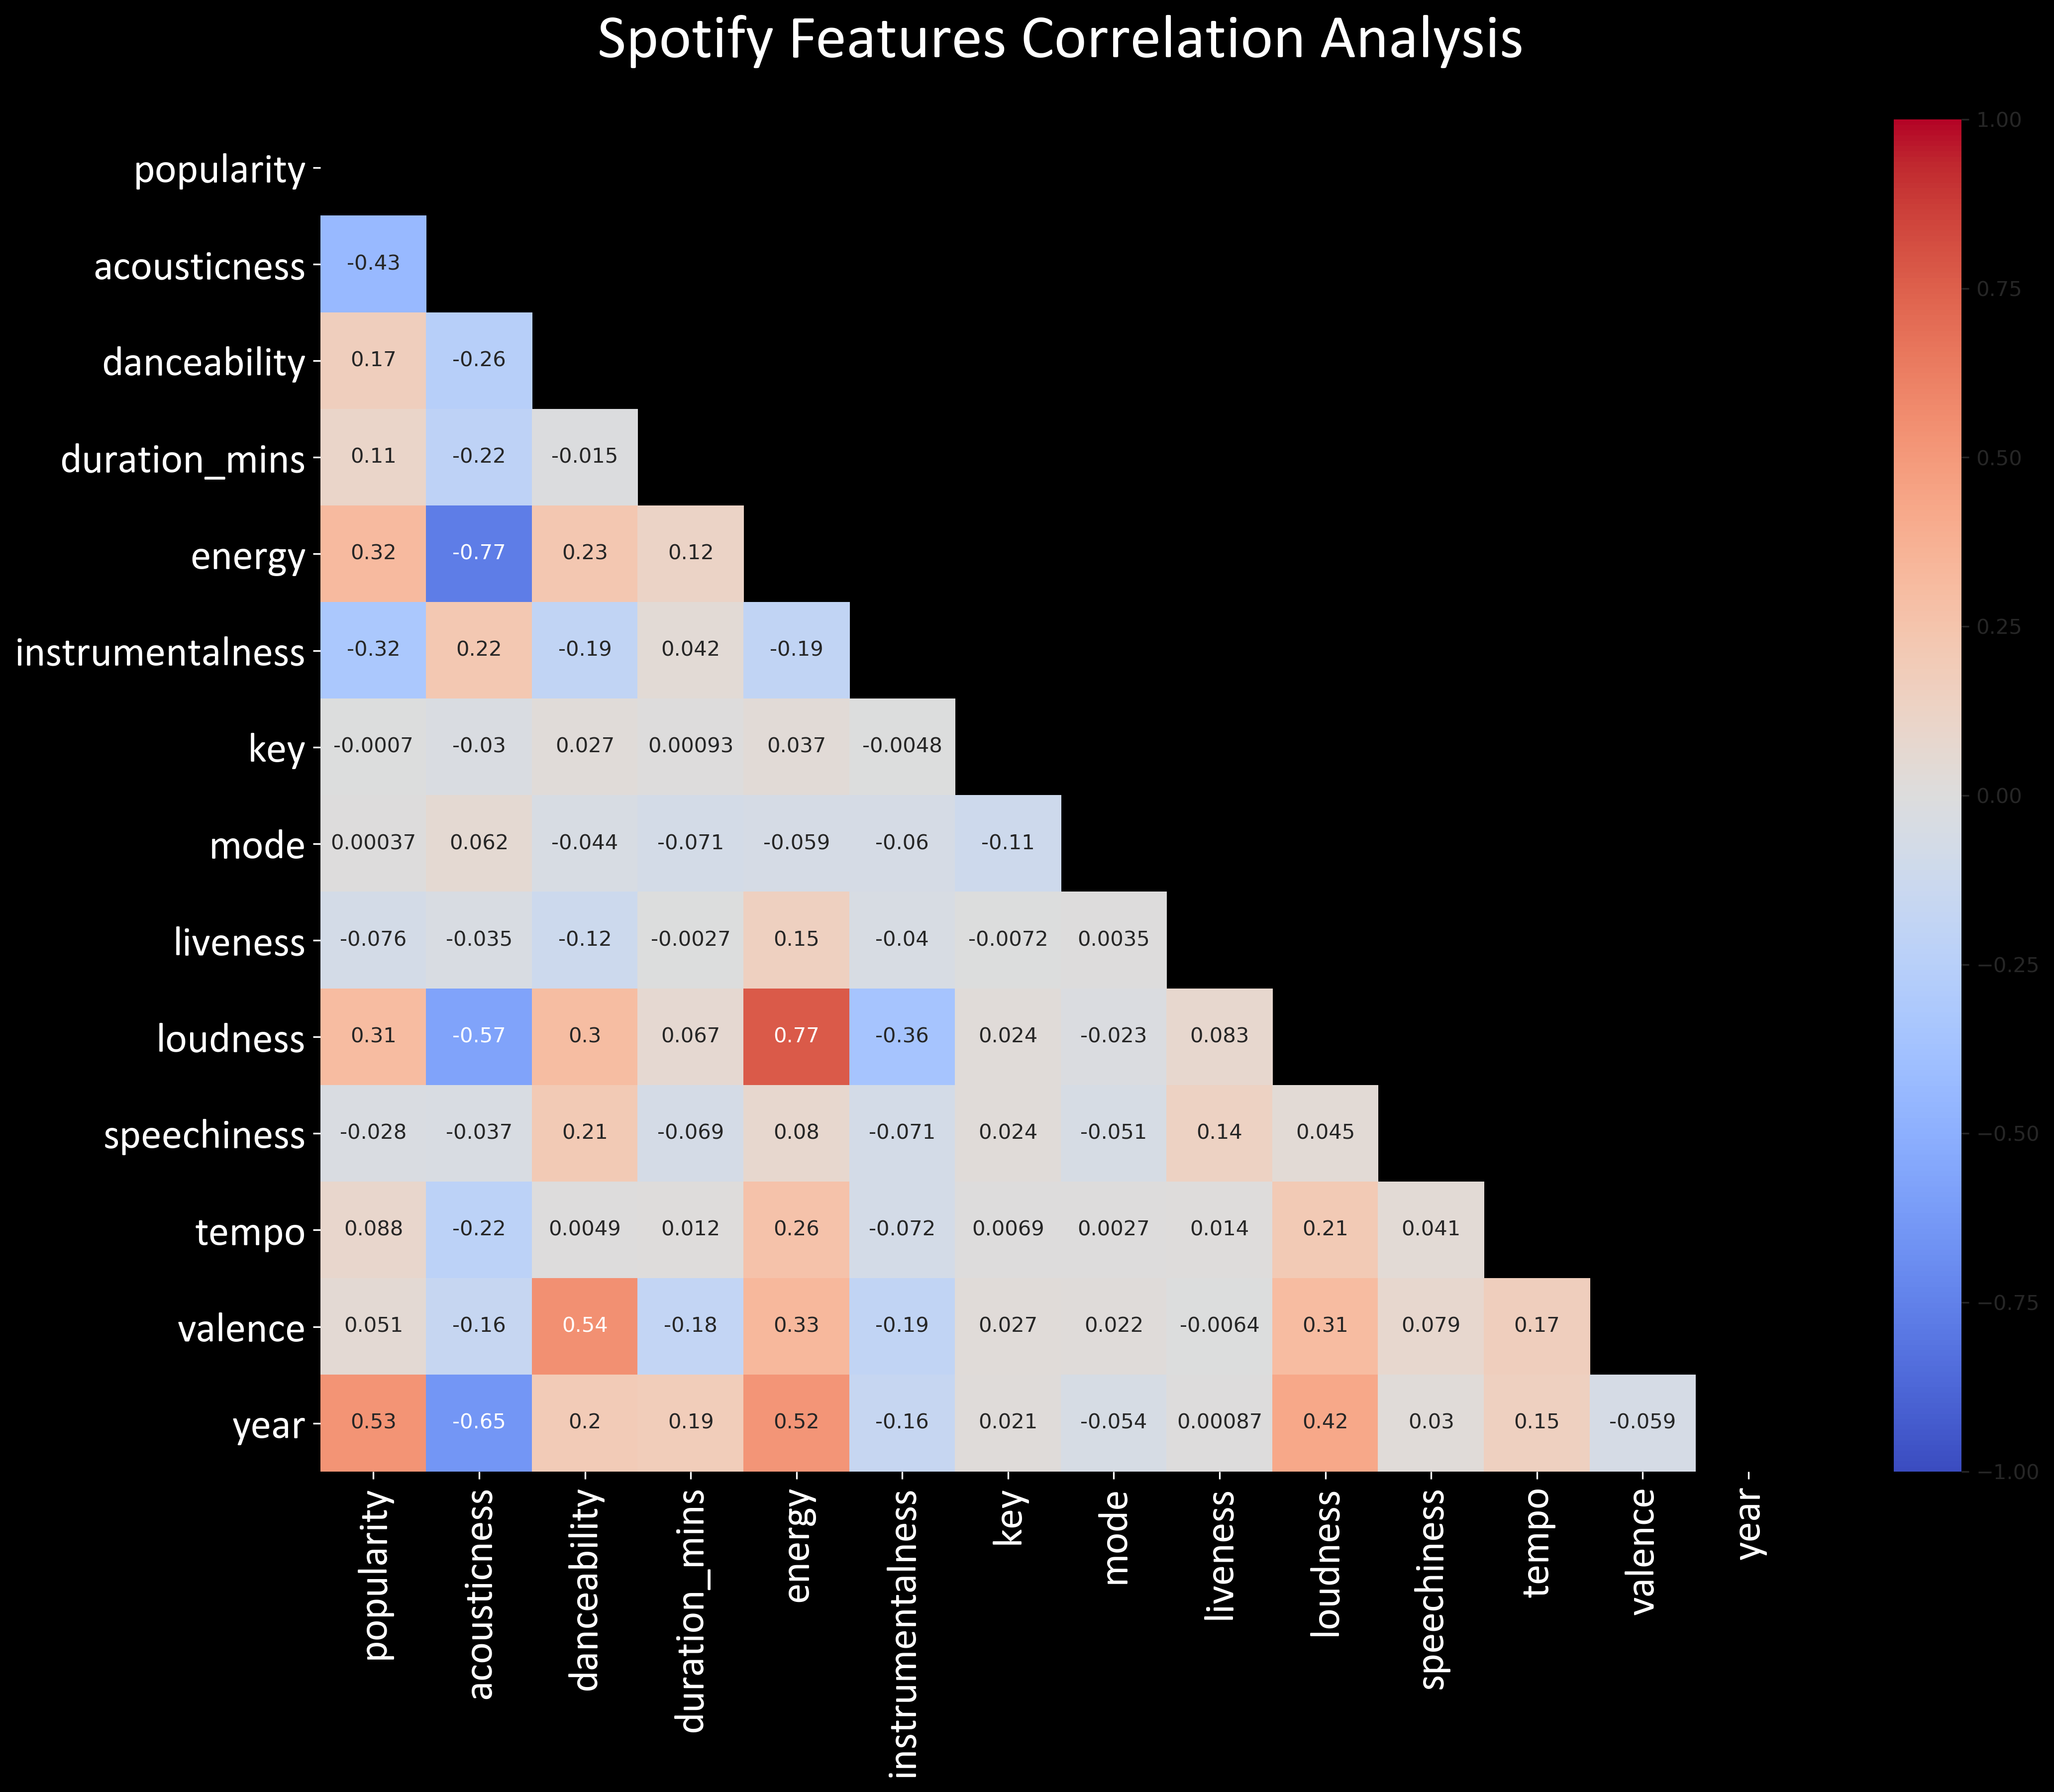

In [6]:
plt.figure(figsize=(16,12), dpi=300)
plt.title("Spotify Features Correlation Analysis", fontsize=30, c='w', pad=30)

matrix = np.triu(df[numerical_variables].corr())

with sns.axes_style("white"):
    sns.heatmap(df[numerical_variables].corr(), vmin=-1, vmax=1, center=0, linecolor='black', cmap='coolwarm', annot=True, mask=matrix)

# plt.ylabel("Musical Feature Scores\n(10 year RA)", fontsize=18, labelpad=20)
# plt.xlabel("Year", fontsize=18, labelpad=20)           
plt.tick_params(labelsize=20)
    
plt.show()

#### Correlation Heatmap Observations & Analysis

The features with the highest correlation to the popularity are: 
- Year (0.53)
- Loudness (0.31)
- Energy (0.32) 
- Danceability (0.17) 

Since the popularity metric is mainly based on the total number of plays the track has had and how recent those plays were, it makes sense that newer songs tend to be played more frequently among Spotify users. Furthermore the <a href ="https://www.musicbusinessworldwide.com/stat-of-the-week-people-over-45-not-millennials-are-driving-music-subscription-growth-in-the-uk/">demographics</a> of Spotify users (50-60% of users aged 34 years and below) suggest there would be a higher preference for listening to songs of their generation, as opposed to songs released before the 1980s. 

Some correlation is observed between louder and more energetic songs, and popularity. This requires further exploring the other correlations in the heatmap: 
- Loudness and energy have a strong positive correlation with each other (0.77), 
- Both loudness and energy have a sizeable correlation with year (0.31 and 0.32 respectively) 
This suggests that newer songs tend to be louder and more energetic, and songs of this nature tend to be more popular with users. On a deeper level, it also highlights how music has evolved over the decades to be more upbeat and how songs now have higher audio quality. 

Other interesting correlations include: 
- Acousticness vs Energy (-0.77), Year (-0.65), Loudness (-0.57), Popularity (-0.43), Danceability (-0.26), Tempo (-0.22), Instrumentalness (0.22)

Acoustic means 'without electrical amplification', so higher acoustic levels are associated with the use of acoustic guitars and pianos, instead of electric guitars and keyboards. These songs are typically slower (as observed by the negative correlation with tempo) and lower in energy / loudness levels. The negative correlation with popularity (-0.43) shows that listeners may not have a preference for instrumentals or soothing music. 

- Valence vs Danceability (0.54), Energy (0.33), Loudness (0.31)

Valence uses other measures like key and tempo to determine whether a song has positive or negative emotions. Higher valence scores are generally associated with songs which are more 'dance-worthy', energetic and loud. We do note that there is no clear correlation between valence and popularity, suggesting that the popularity of a song is not necessarily dependent on how happy it sounds. 
 

## 3.1 Continuous Variables

### 3.1.1 Popularity Distribution 

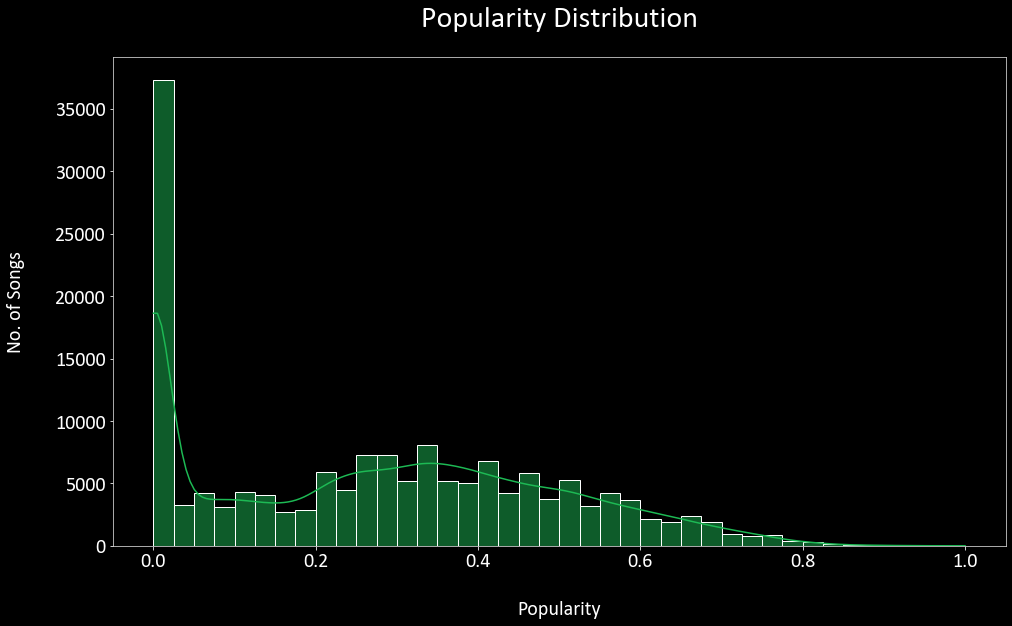

In [72]:
plt.figure(figsize=(16,9))

sns.histplot(df['popularity'], bins=40, kde=True,color='#1DB954')
plt.xlabel('Popularity', fontsize=20, labelpad=30)
plt.ylabel('No. of Songs', fontsize=20, labelpad=30)
plt.tick_params(labelsize=20)
plt.title("Popularity Distribution", fontsize=30, c='w', pad=30)

plt.show()

From the above graph, we see that the vast majority of songs have a popularity rating of 0. This is largely due to the way Spotify's algorithm calculates the song popularity rating which "is based, in the most part, on the total number of plays the track has had and how recent those plays are" (<a href="https://developer.spotify.com/documentation/web-api/reference/#objects-index">source</a>). 

Thus, songs being played a lot now would have a higher popularity compared to songs that were played a lot in the past. This is explored in the charts below. Given that the majority of Spotify users are below the age of 34, we do expect to see more popular songs in the years after 1990. 

In [8]:
df[df['popularity'] >= 0.7]['year'].value_counts().sort_values(ascending=False).head(30)

2020    845
2019    528
2018    455
2017    361
2016    184
2015    176
2013    106
2014    101
2012     89
2011     79
2010     67
2021     59
2007     57
2008     54
2006     54
2004     48
2005     48
2009     44
2002     42
2000     40
1999     39
2001     37
1994     32
2003     30
1997     29
1984     28
1991     26
1993     22
1996     22
1977     21
Name: year, dtype: int64

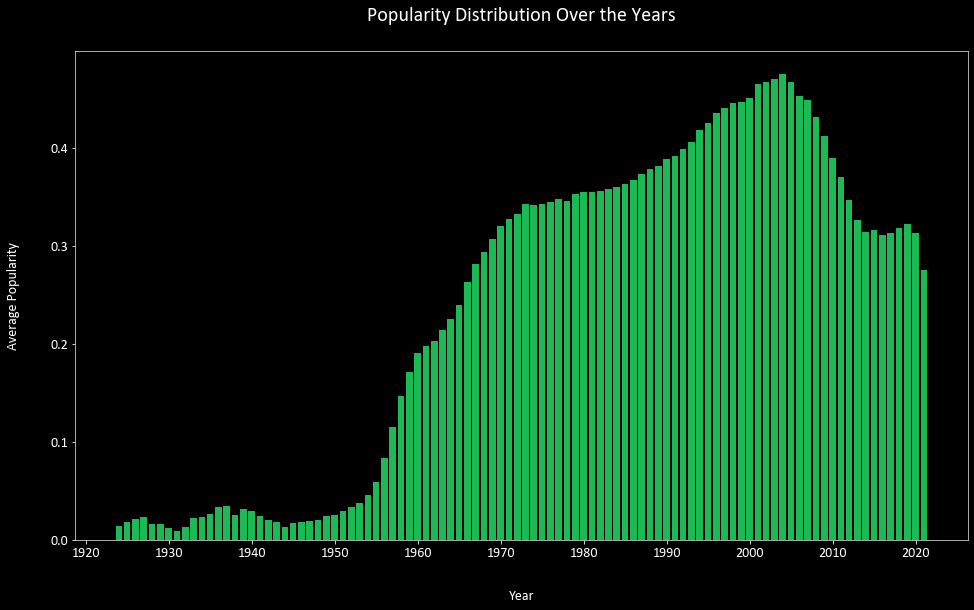

In [9]:
plt.figure(figsize=(16,9))

plt.bar(x=df.groupby('year').mean()['popularity'].index, height=df.groupby('year').mean()['popularity'].rolling(5).mean(), color='#1DB954')
plt.xlabel('Year', fontsize=14, labelpad=30)
plt.ylabel('Average Popularity', fontsize=14, labelpad=30)
plt.tick_params(labelsize=14)
plt.title("Popularity Distribution Over the Years", fontsize=20, c='w', pad=30)
plt.xticks(np.arange(1920, 2030, step=10))

plt.show()

View by decade

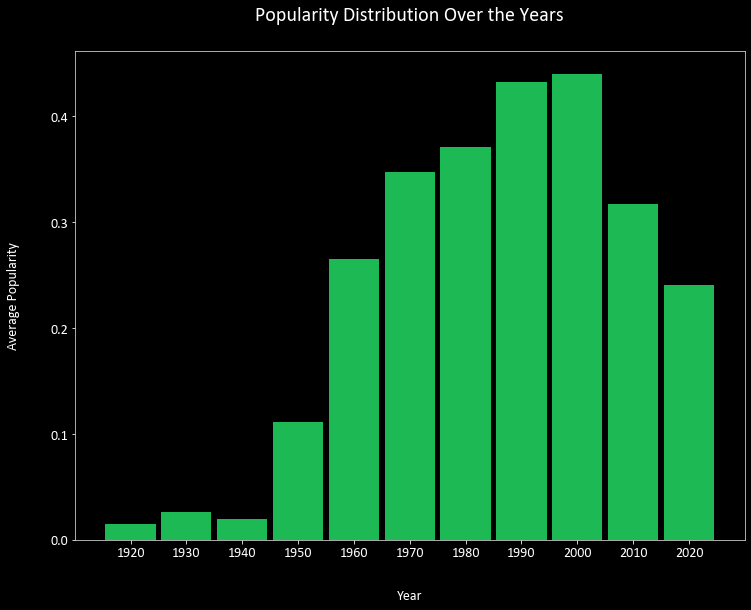

In [10]:
plt.figure(figsize=(12,9))

plt.bar(x=df.resample('10AS').mean()['popularity'].index.year, height=df.resample('10AS').mean()['popularity'].values, color='#1DB954', width=9)
plt.xlabel('Year', fontsize=14, labelpad=30)
plt.ylabel('Average Popularity', fontsize=14, labelpad=30)
plt.tick_params(labelsize=14)
plt.title("Popularity Distribution Over the Years", fontsize=20, c='w', pad=30)
plt.xticks(np.arange(1920, 2030, step=10))
plt.show()



As expected, songs in the 1990s and 2000s have the highest popularity ratings, indicating that songs released in these eras have been played the most, and have been played recently. 

### 3.1.2 Songs Released by Year

In [11]:
df['year'].value_counts().head()

2020    3547
2018    2485
2013    2287
2016    2158
2019    2146
Name: year, dtype: int64

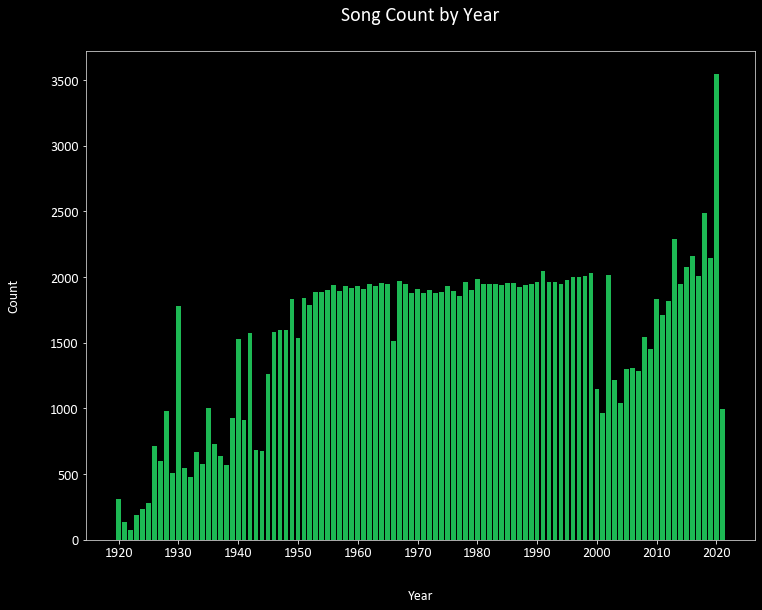

In [12]:
plt.figure(figsize=(12,9))
ax = plt.axes()
# ax.set_facecolor('#191414')

plt.bar(x=df['year'].value_counts().index, height=df['year'].value_counts().values, color='#1DB954')
plt.xlabel('Year', fontsize=14, labelpad=30)
plt.ylabel('Count', fontsize=14, labelpad=30)
plt.tick_params(labelsize=14)
plt.title("Song Count by Year", fontsize=20, pad=30, c='w')
plt.xticks(np.arange(1920, 2030, step=10))

plt.show()

##### Songs released by decade

In [13]:
df.resample('10AS').count()['artists'].values

array([ 4020,  7921, 13244, 18528, 18931, 19011, 19495, 19893, 13279,
       20470,  4542], dtype=int64)

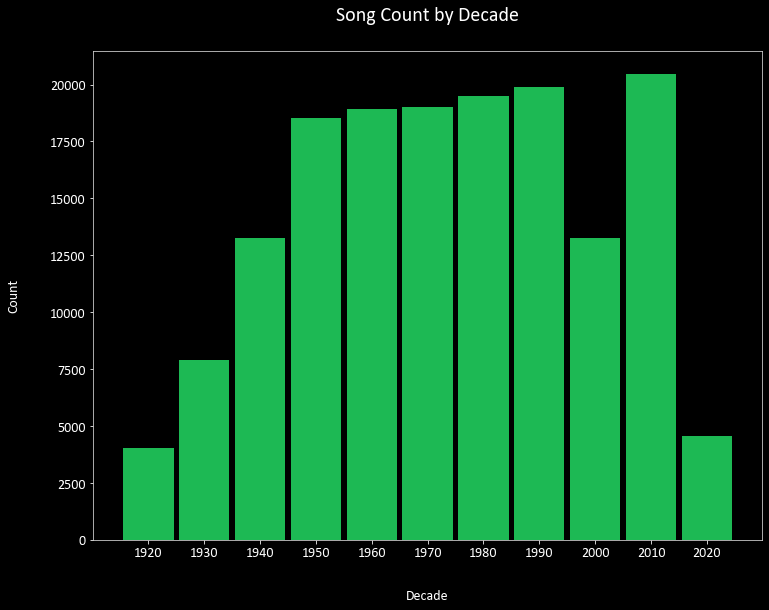

In [14]:
plt.figure(figsize=(12,9))

plt.bar(x=df.resample('10AS').count().index.year, height=df.resample('10AS').count()['artists'].values, width=9, color='#1DB954')
plt.xlabel('Decade', fontsize=14, labelpad=30)
plt.ylabel('Count', fontsize=14, labelpad=30)
plt.tick_params(labelsize=14)
plt.title("Song Count by Decade", fontsize=20, pad=30, c='w')
plt.xticks(np.arange(1920, 2030, step=10))

plt.show()

Decades with the highest number of songs in the dataset are 2010, followed by 1950, 1960, 1970, 1980 and 1990. 

### 3.1.3 Musical Features by Decade

In [15]:
df_YA = df[['acousticness', 'danceability','energy', 'instrumentalness', 'liveness', 'speechiness', 'valence','year']].groupby('year').mean().sort_values('year')
df_YA.tail()

acousticness  danceability    energy  instrumentalness  liveness  \
year                                                                     
2017      0.198505      0.585950  0.684472          0.231327  0.229536   
2018      0.217843      0.602869  0.663307          0.224599  0.226036   
2019      0.264137      0.608068  0.629241          0.206835  0.216441   
2020      0.200695      0.604017  0.676469          0.239464  0.240797   
2021      0.341746      0.632948  0.577063          0.365269  0.169539   

      speechiness   valence  
year                         
2017     0.097285  0.440281  
2018     0.109671  0.426094  
2019     0.106582  0.462565  
2020     0.099968  0.455879  
2021     0.103539  0.417048

In [16]:
df_10_YA = df_YA.rolling(10).mean()
df_10_YA

acousticness  danceability    energy  instrumentalness  liveness  \
year                                                                     
1920           NaN           NaN       NaN               NaN       NaN   
1921           NaN           NaN       NaN               NaN       NaN   
1922           NaN           NaN       NaN               NaN       NaN   
1923           NaN           NaN       NaN               NaN       NaN   
1924           NaN           NaN       NaN               NaN       NaN   
...            ...           ...       ...               ...       ...   
2017      0.231116      0.577948  0.669268          0.194260  0.215180   
2018      0.225172      0.581819  0.667741          0.205682  0.214780   
2019      0.227162      0.586123  0.661297          0.212089  0.216004   
2020      0.226470      0.586531  0.662974          0.220549  0.219119   
2021      0.236300      0.592173  0.655027          0.237282  0.216266   

      speechiness   valence  
year                         
1920          NaN       NaN  
1921          NaN       NaN  
1922          NaN       NaN  
1923          NaN       NaN  
1924          NaN       NaN  
...           ...       ...  
2017     0.084182  0.479248  
2018     0.087838  0.465849  
2019     0.091032  0.458406  
2020     0.093030  0.450792  
2021     0.095415  0.445060  

[102 rows x 7 columns]

In [17]:
cont_features = ['acousticness', 'danceability','energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']

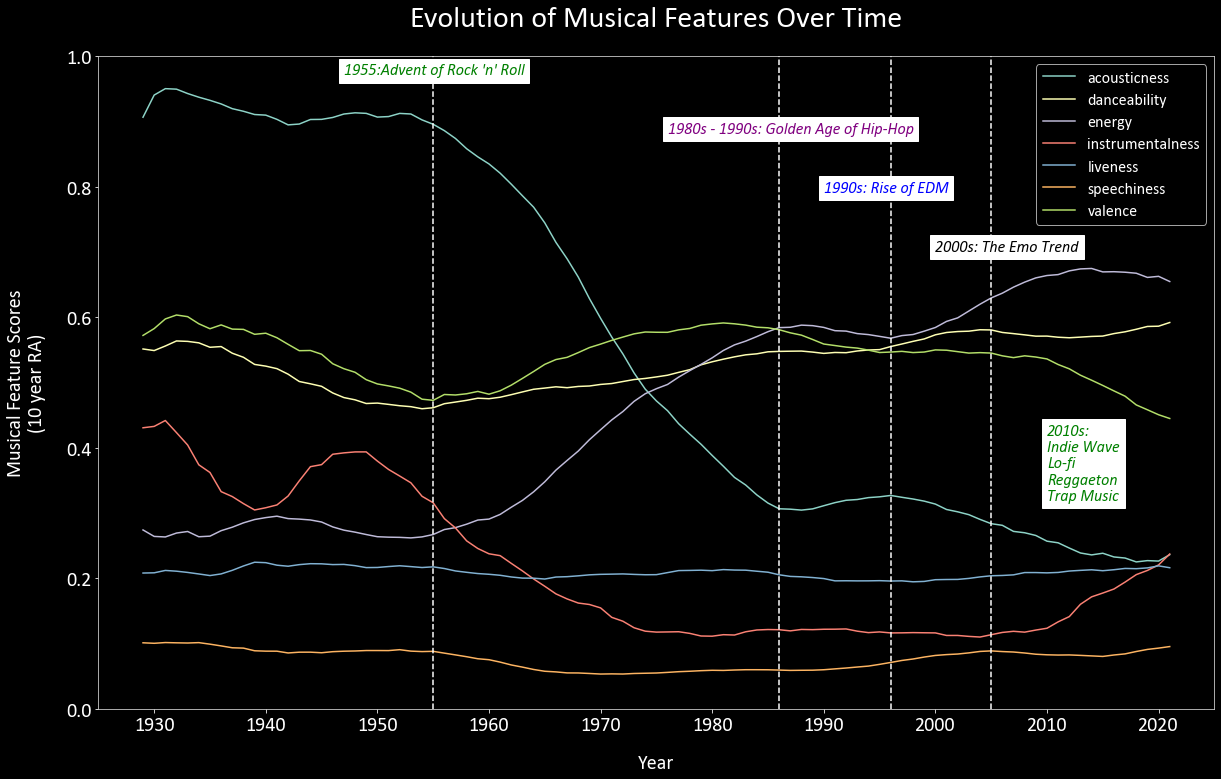

In [18]:
plt.figure(figsize=(20,12))

for feature in cont_features: 
    ax = sns.lineplot(x=df_10_YA.index, y=feature, data=df_10_YA, label=feature)
    legend = plt.legend(fontsize=16, loc='upper right')
    plt.setp(legend.get_texts(), color='w')

plt.title("Evolution of Musical Features Over Time", c='white', fontsize=30, pad=30)
plt.ylabel("Musical Feature Scores\n(10 year RA)", fontsize=20, labelpad=20)
plt.xlabel("Year", fontsize=20, labelpad=20)           
plt.tick_params(labelsize=20)
plt.xticks(np.arange(1920, 2030, step=10))

plt.xlim([1925, 2025])
plt.ylim([0,1])

plt.axvline(x=1955, color='grey', linestyle='--', c='w')
plt.text(1947, 0.972, "1955:Advent of Rock 'n' Roll", c='g', style='italic', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 5}, fontsize=16)

plt.axvline(x=1986, color='grey', linestyle='--', c='w')
plt.text(1976, 0.882, '1980s - 1990s: Golden Age of Hip-Hop', c='purple', style='italic', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 5}, fontsize=16)

plt.axvline(x=1996, color='grey', linestyle='--', c='w')
plt.text(1990, 0.792, '1990s: Rise of EDM', c='blue', style='italic', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 5}, fontsize=16)

plt.axvline(x=2005, color='grey', linestyle='--', c='w')
plt.text(2000, 0.702, '2000s: The Emo Trend', c='black', style='italic', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 5}, fontsize=16)

# plt.axvline(x=2015, color='grey', linestyle='--', c='w')
plt.text(2010, 0.32, '2010s:\nIndie Wave\nLo-fi\nReggaeton\nTrap Music', c='g', style='italic', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 5}, fontsize=16)

plt.show()

Several interesting observations from the plot above: 



From the 1950s, the upward trend of energy and and danceability has been matched by the downward movement of acousticness. This makes sense as the songs which are more energetic and danceable tend to be of rock and roll or electronic dance music genres, both of which heavily utilise instruments that produce sounds electronically (eg. electric guitar)  

- To understand why this happened requires an understanding of how music evolved during the 1950s. Rock 'n' roll was starting to pick up with <a href="https://www.aimm.edu/blog/evolution-of-music-from-the-1950s-to-the-2000s">Elvis Presley</a> becoming one of the most prominent faces in that genre. This partly helped along by massive improvements in <a href="https://www.asme.org/topics-resources/content/top-10-technology-innovations-got-rock-rolling">music technology</a> where electric bass guitars, transistor radios and upgraded microphones (among several other intruments</a>) set the standards for the music industry. 
- One factor contributing to the evolution of music technology was the <a href="https://www.britannica.com/art/electronic-instrument/Post-World-War-II-electronic-instruments">advances in electronic technology during World War II</a> which was then applied to electronic musical instruments. 

Between the 1980s to early 2000s, speechiness rose alongside danceability, while energy declined momentarily before increasing again. This can be attributed to the <a href="https://historyofthehiphop.wordpress.com/music-genres/golden-age-hip-hop/">Golden Age of Hip-Hop</a> from the mid 80's to mid 90's where rap music first gained immense popularity among music listeners. Since rap music is known for its lyrical content, thus justifying the increase in speechiness. It was also during this time that <a href="https://storymaps.arcgis.com/stories/29146e9f0d69443bbdec4d6a56c9776b">hip-hop dance</a> rose to prominence. 

Other than the resurgence of pop music, the 1990s were massively influenced by <a href="https://oneedm.com/columns/automated/the-history-of-electronic-dance-music-the-1990s/">electronic dance music</a>, with technological improvements driving the emergence of house music, techno and trance music to name a few. 

From the 2000s, we note a decline in valence (happiness of a song), reflecting the growth of 'emo' (eg. pop punk, indie rock) music. Despite this, energy levels continued rising. This was because most emo songs in that era were typically high tempo (eg. My Chemical Romance, Paramore) 

However, the 2010s saw a change in multiple features. Instrumentalness rose rapidly while energy and valence decreased. A compelling reason for this was the rise in popularity of the <a href="https://www.musicgateway.com/blog/how-to/what-is-lo-fi-how-do-you-produce-a-lo-fi-song">lo-fi genre of music</a>, which relies heavily on instrumentalness and usually contains minimal lyrics. These are songs gained traction among many youths who used these exclusively as background music for studying, working or to relax. 

The 2010s also saw the rise of <a href="https://mn2s.com/news/features/from-reggaeton-to-riches-inside-latin-musics-global-takeover/">reggaeton</a> and <a href="https://theface.com/music/trap-music-gucci-future-thug-travis">trap music</a>, both of which became increasingly commonplace in nightclubs and music festivals as the decade wore on. 

### 3.1.4 Tempo (BPM)

In [19]:
df.groupby('year').mean()['tempo'].rolling(5).mean()

year
1920           NaN
1921           NaN
1922           NaN
1923           NaN
1924    110.889263
           ...    
2017    122.994388
2018    123.023276
2019    122.585199
2020    123.255418
2021    122.713266
Name: tempo, Length: 102, dtype: float64

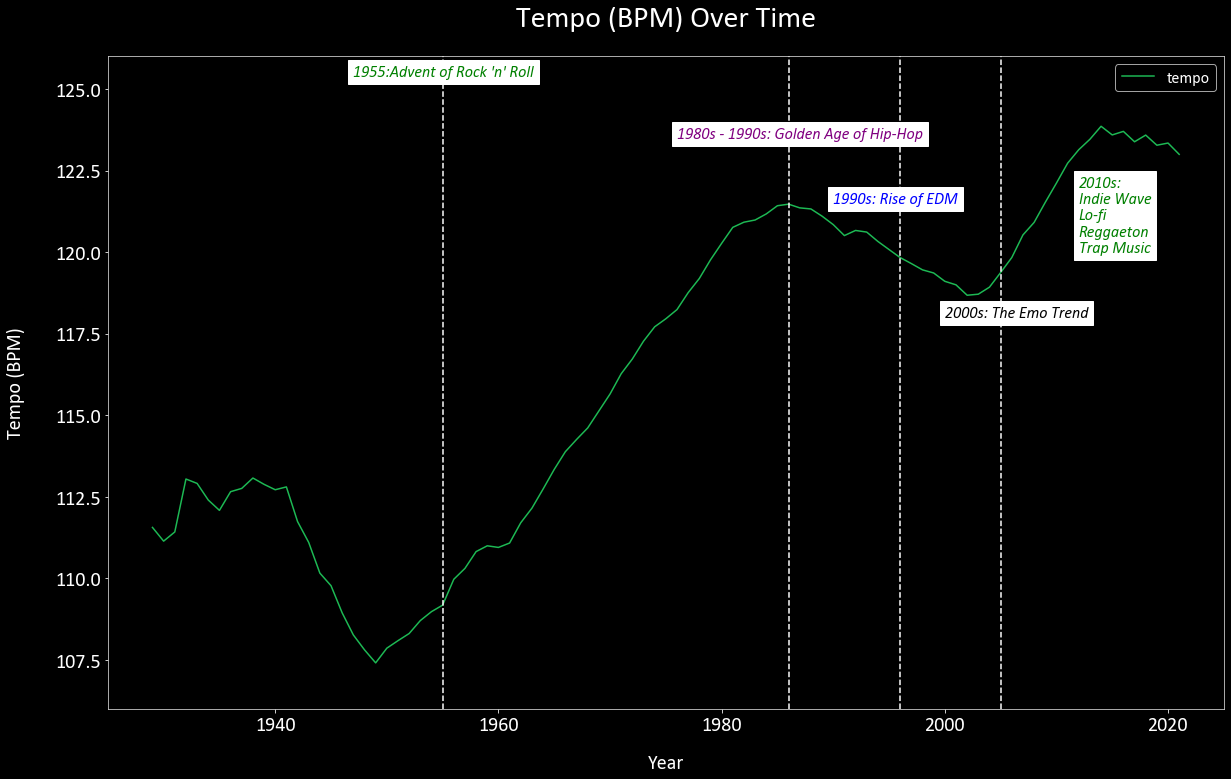

In [20]:
plt.figure(figsize=(20, 12))

sns.lineplot(x=df.groupby('year').mean()['tempo'].index, y=df.groupby('year').mean()['tempo'].rolling(10).mean().values, label='tempo', color='#1DB954')
legend = plt.legend(fontsize=16)
plt.setp(legend.get_texts(), color='w')

plt.title("Tempo (BPM) Over Time", color='w', pad=30, fontsize=30)
plt.ylabel("Tempo (BPM)", fontsize=20, labelpad=30)
plt.xlabel("Year", fontsize=20, labelpad=20)           
plt.tick_params(labelsize=20)

plt.xlim([1925, 2025])
plt.ylim([106, 126])

plt.axvline(x=1955, color='grey', linestyle='--', c='w')
plt.text(1947, 125.4, "1955:Advent of Rock 'n' Roll", c='g', style='italic', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 5}, fontsize=16)

plt.axvline(x=1986, color='grey', linestyle='--', c='w')
plt.text(1976, 123.5, '1980s - 1990s: Golden Age of Hip-Hop', c='purple', style='italic', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 5}, fontsize=16)

plt.axvline(x=1996, color='grey', linestyle='--', c='w')
plt.text(1990, 121.5, '1990s: Rise of EDM', c='blue', style='italic', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 5}, fontsize=16)

plt.axvline(x=2005, color='grey', linestyle='--', c='w')
plt.text(2000, 118, '2000s: The Emo Trend', c='black', style='italic', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 5}, fontsize=16)

# plt.axvline(x=2015, color='grey', linestyle='--', c='w')
plt.text(2012, 120, '2010s:\nIndie Wave\nLo-fi\nReggaeton\nTrap Music', c='g', style='italic', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 5}, fontsize=16)

plt.show()

The upward trend of tempo (BPM) over the years also coincides with the increase in energy and danceability of songs as songs of this nature tend to have a faster beat. 

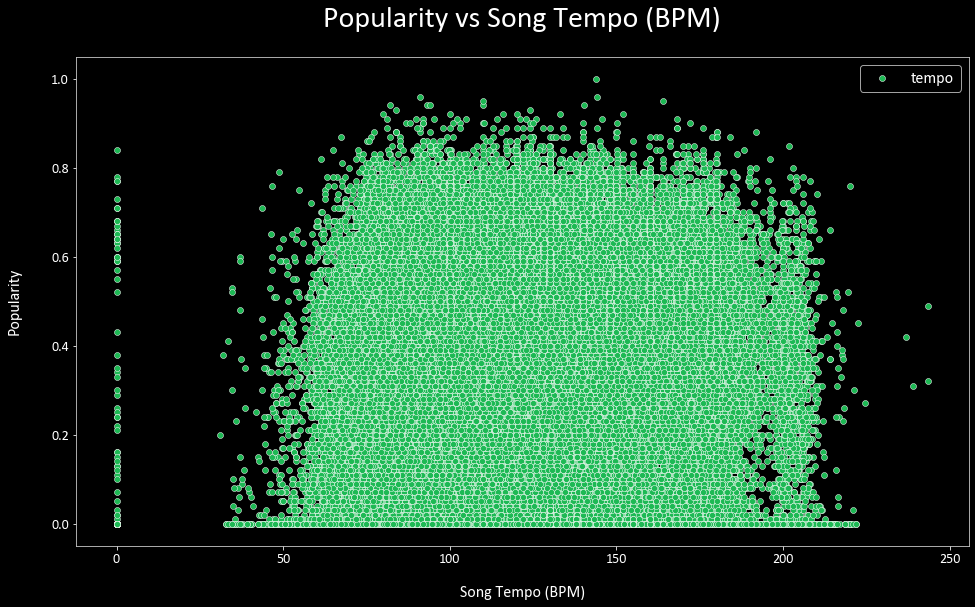

In [21]:
plt.figure(figsize=(16,9))

sns.scatterplot(x=df['tempo'], y=df['popularity'], label='tempo', color='#1DB954')
legend = plt.legend(fontsize=16)
plt.setp(legend.get_texts(), color='w')

plt.title("Popularity vs Song Tempo (BPM)", color='w', fontsize=30, pad=30)
plt.ylabel("Popularity", fontsize=16, labelpad=30)
plt.xlabel("Song Tempo (BPM)", fontsize=16, labelpad=20)           
plt.tick_params(labelsize=14)
    
plt.show()

Not much of a clear trend between tempo and popularity, although we do see the majority of songs lying between 75 to 175 BPM.

Overlay tempo with energy and danceability

### 3.1.5 Loudness

In [22]:
df.groupby('year').mean()['loudness']

year
1920   -12.261426
1921   -15.796558
1922   -19.275282
1923   -14.129211
1924   -14.183708
          ...    
2017    -7.981171
2018    -8.019460
2019    -8.438583
2020    -7.924402
2021    -9.784571
Name: loudness, Length: 102, dtype: float64

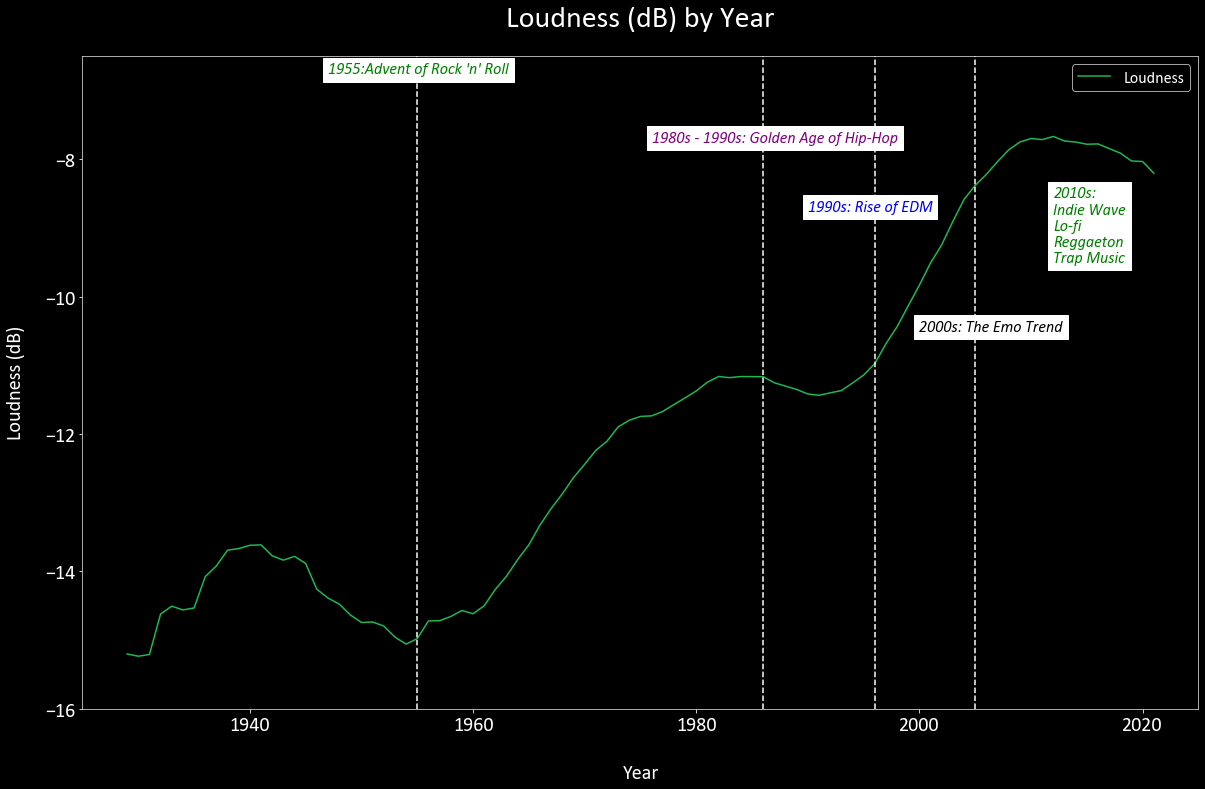

In [23]:
plt.figure(figsize=(20,12))

sns.lineplot(x=df.groupby('year').mean()['loudness'].index, y=df.groupby('year').mean()['loudness'].rolling(10).mean().values, label='Loudness', color='#1DB954')
legend = plt.legend(fontsize=16)
plt.setp(legend.get_texts(), color='w')

plt.title("Loudness (dB) by Year", color='w', fontsize=30, pad=30)
plt.ylabel("Loudness (dB)", fontsize=20, labelpad=20)
plt.xlabel("Year", fontsize=20, labelpad=30)           
plt.tick_params(labelsize=20)

plt.xlim([1925, 2025])
plt.ylim([-16, -6.5])

plt.axvline(x=1955, color='grey', linestyle='--', c='w')
plt.text(1947, -6.75, "1955:Advent of Rock 'n' Roll", c='g', style='italic', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 5}, fontsize=16)

plt.axvline(x=1986, color='grey', linestyle='--', c='w')
plt.text(1976, -7.75, '1980s - 1990s: Golden Age of Hip-Hop', c='purple', style='italic', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 5}, fontsize=16)

plt.axvline(x=1996, color='grey', linestyle='--', c='w')
plt.text(1990, -8.75, '1990s: Rise of EDM', c='blue', style='italic', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 5}, fontsize=16)

plt.axvline(x=2005, color='grey', linestyle='--', c='w')
plt.text(2000, -10.5, '2000s: The Emo Trend', c='black', style='italic', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 5}, fontsize=16)

# plt.axvline(x=2015, color='grey', linestyle='--', c='w')
plt.text(2012, -9.5, '2010s:\nIndie Wave\nLo-fi\nReggaeton\nTrap Music', c='g', style='italic', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 5}, fontsize=16)

    
plt.show()

In [24]:
df.sort_values('loudness', ascending=False)

acousticness                 artists  danceability  energy  \
release_date                                                               
1936-05-27        0.000047        ['Apocolothoth']         0.000   0.114   
1973-02-07        0.000467         ['The Stooges']         0.186   0.997   
2017-10-06        0.097200          ['Wolfchilde']         0.190   0.941   
1973-02-07        0.006160         ['The Stooges']         0.228   0.998   
1944-06-09        0.024300         ['DYING SPASM']         0.316   0.529   
...                    ...                     ...           ...     ...   
1949-02-17        0.000000       ['Future Rapper']         0.000   0.000   
1998-01-01        0.000000  ['Time Bomb Symphony']         0.000   0.000   
1960-01-01        0.000000      ['Connie Francis']         0.000   0.000   
1938-01-01        0.000000       ['Benny Goodman']         0.000   0.000   
1949-01-01        0.000000       ['Sarah Vaughan']         0.000   0.000   

              explicit                      id  instrumentalness  key  \
release_date                                                            
1936-05-27           0  050FXMyCrQJG01AT55Jvk1            0.9980    0   
1973-02-07           0  0Aveu2KsriohUafrrerz1F            0.0202    9   
2017-10-06           0  30LzGsdwvmCd0w7tuMmi6j            0.0000    7   
1973-02-07           0  7bqn4e3nGorbHDgP3yL9G7            0.2210    2   
1944-06-09           0  5a1zE4Pl5Y0pEMstZMJlBH            0.7040   11   
...                ...                     ...               ...  ...   
1949-02-17           0  0Rd7eiAZGayLT8TmrVpQzG            0.0000    0   
1998-01-01           0  6jbDzD5bYs1uzpDvRjCK7y            0.0000    2   
1960-01-01           0  0zr7DJGTPUfAUmjM7crmt2            0.0000    0   
1938-01-01           0  3IcXTeq9O2dpsSXsDj9naH            0.0000    0   
1949-01-01           0  0hr9kRUi2X4MXc72A4VxG4            0.0000    0   

              liveness  loudness  mode  \
release_date                             
1936-05-27      0.5780     3.855     0   
1973-02-07      0.0644     3.744     1   
2017-10-06      0.4100     3.367     1   
1973-02-07      0.0746     1.963     1   
1944-06-09      0.1110     1.830     0   
...                ...       ...   ...   
1949-02-17      0.0000   -60.000     0   
1998-01-01      0.0000   -60.000     1   
1960-01-01      0.0000   -60.000     0   
1938-01-01      0.0000   -60.000     0   
1949-01-01      0.0000   -60.000     0   

                                                           name  popularity  \
release_date                                                                  
1936-05-27                                                 Sold        0.00   
1973-02-07    Your Pretty Face Is Going to Hell - Alternate ...        0.35   
2017-10-06                                      Weight of Years        0.00   
1973-02-07                            Death Trip - Iggy Pop Mix        0.29   
1944-06-09                                                 drag        0.00   
...                                                         ...         ...   
1949-02-17                  StaggerLee Has His Day at the Beach        0.00   
1998-01-01                                         You R Heaven        0.33   
1960-01-01                                         Hava Nagilah        0.12   
1938-01-01                                   Pause Track - Live        0.00   
1949-01-01                                          Pause Track        0.00   

              speechiness    tempo  valence  year  duration_mins  
release_date                                                      
1936-05-27         0.0000    0.000   0.0000  1936           2.54  
1973-02-07         0.1540  157.047   0.1070  1973           4.91  
2017-10-06         0.0994  119.774   0.1160  2017           3.63  
1973-02-07         0.1530  155.804   0.0768  1973           6.12  
1944-06-09         0.1390   99.418   0.0368  1944           3.48  
...                   ...      

### 3.1.6 Duration of Song

In [25]:
df['duration_mins'].describe()

count    159334.000000
mean          3.693780
std           1.395405
min           0.080000
25%           2.820000
50%           3.430000
75%           4.360000
max           8.930000
Name: duration_mins, dtype: float64

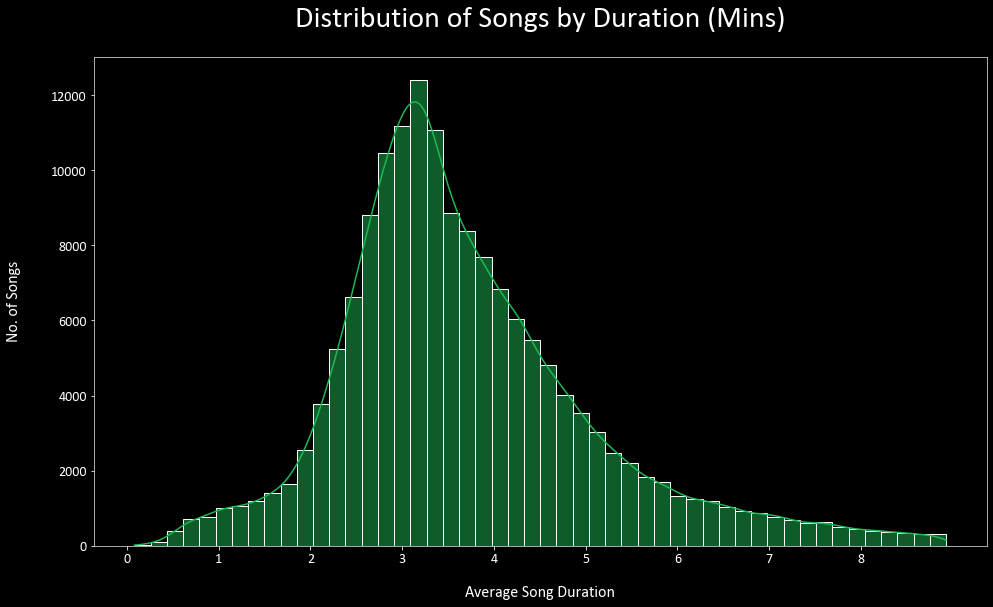

In [26]:
plt.figure(figsize=(16,9))

sns.histplot(df['duration_mins'], bins=50, kde=True,color='#1DB954')

plt.title("Distribution of Songs by Duration (Mins)", color='w', fontsize=30, pad=30)
plt.ylabel("No. of Songs", fontsize=16, labelpad=30)
plt.xlabel("Average Song Duration", fontsize=16, labelpad=20)           
plt.tick_params(labelsize=14)

plt.xticks(np.arange(0, 9, step=1))
plt.show()

In [27]:
round(df.groupby('year').mean()['duration_mins'], 2)

year
1920    3.36
1921    3.76
1922    2.76
1923    2.97
1924    3.04
        ... 
2017    3.75
2018    3.63
2019    3.58
2020    3.51
2021    3.49
Name: duration_mins, Length: 102, dtype: float64

In [28]:
df.groupby('year').mean().index

Int64Index([1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929,
            ...
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='year', length=102)

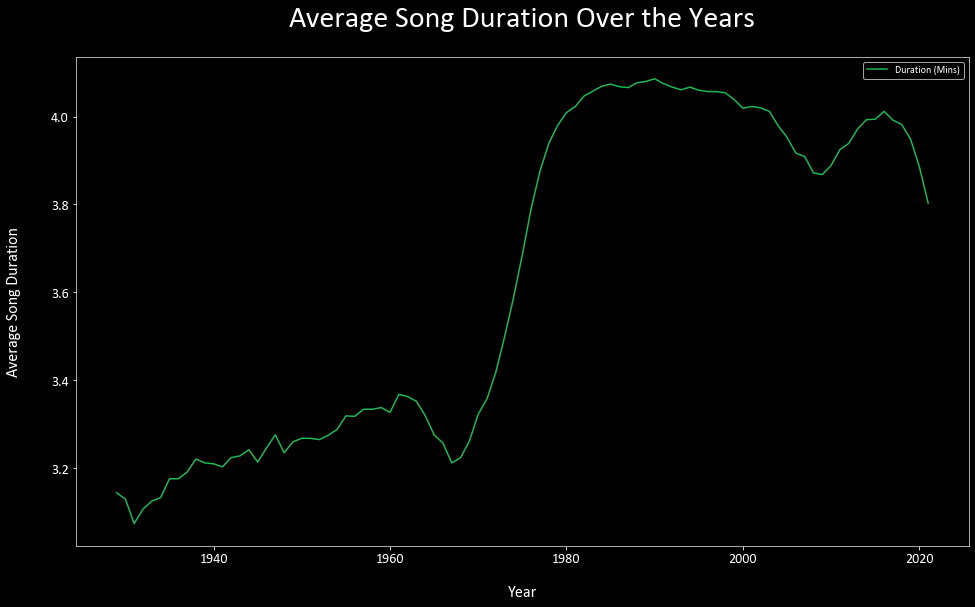

In [29]:
plt.figure(figsize=(16,9))

sns.lineplot(x=df.groupby('year').mean().index, y=round(df.groupby('year').mean()['duration_mins'], 2).rolling(10).mean(), label='Duration (Mins)', color='#1DB954')
legend = plt.legend()
plt.setp(legend.get_texts(), color='w')

plt.title("Average Song Duration Over the Years", color='w', fontsize=30, pad=30)
plt.ylabel("Average Song Duration", fontsize=16, labelpad=30)
plt.xlabel("Year", fontsize=16, labelpad=20)           
plt.tick_params(labelsize=14)
    
plt.show()

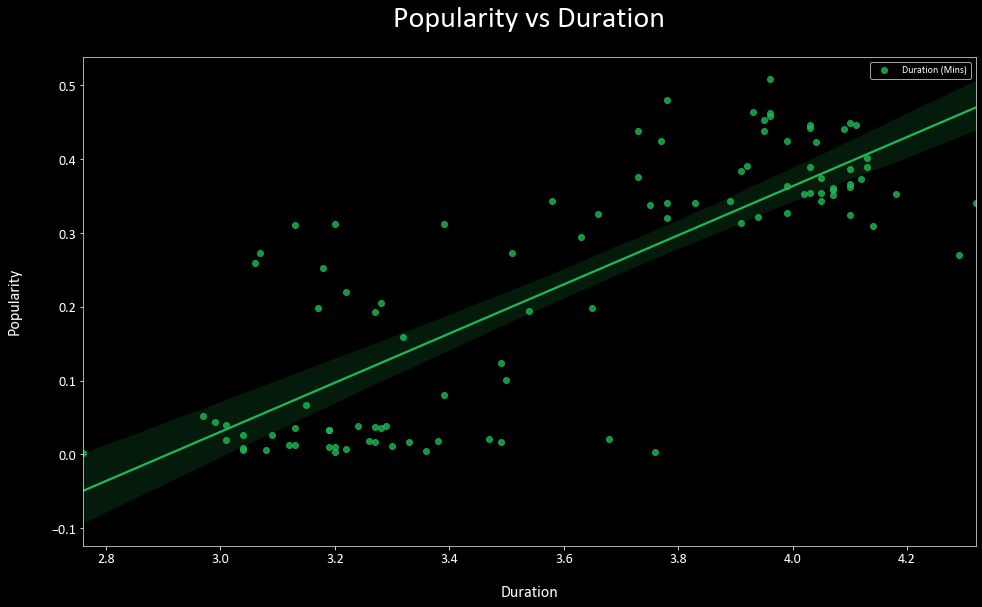

In [30]:
plt.figure(figsize=(16,9))

sns.regplot(x=round(df.groupby('year').mean()['duration_mins'], 2), y=df.groupby('year').mean()['popularity'], label='Duration (Mins)', color='#1DB954')
legend = plt.legend()
plt.setp(legend.get_texts(), color='w')

plt.title("Popularity vs Duration", color='w', fontsize=30, pad=30)
plt.ylabel("Popularity", fontsize=16, labelpad=30)
plt.xlabel("Duration", fontsize=16, labelpad=20)           
plt.tick_params(labelsize=14)
    
plt.show()

## 3.2 Categorical Variables

In [31]:
categorical_variables = ['artists', 'explicit', 'key', 'mode', 'name']

In [32]:
df[categorical_variables].head()

artists  explicit  key  mode  \
release_date                                                   
1920-01-01              ['Mamie Smith']         0    5     0   
1920-01-05    ["Screamin' Jay Hawkins"]         0    5     0   
1920-01-01              ['Mamie Smith']         0    0     1   
1920-01-01          ['Oscar Velazquez']         0    2     1   
1920-10-01                     ['Mixe']         1   10     0   

                                                           name  
release_date                                                     
1920-01-01                             Keep A Song In Your Soul  
1920-01-05                                 I Put A Spell On You  
1920-01-01                                         Golfing Papa  
1920-01-01    True House Music - Xavier Santos & Carlos Gomi...  
1920-10-01                                            Xuniverxe

### 3.2.1 Song Explicit-ness 

In [33]:
df.groupby('year').mean()['explicit']

year
1920    0.138710
1921    0.079710
1922    0.000000
1923    0.000000
1924    0.000000
          ...   
2017    0.226820
2018    0.244668
2019    0.250233
2020    0.190302
2021    0.115578
Name: explicit, Length: 102, dtype: float64

##### Average Explicitness of Songs Over the Years

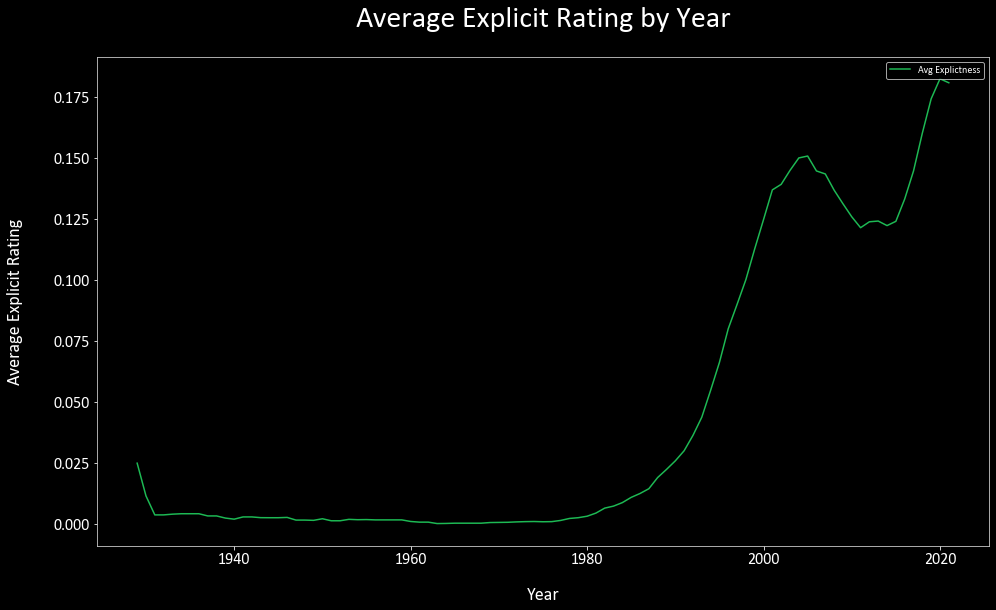

In [34]:
plt.figure(figsize=(16,9))

sns.lineplot(x=df.groupby('year').mean()['explicit'].index, y=df.groupby('year').mean()['explicit'].rolling(10).mean().values, label='Avg Explictness', color='#1DB954')
legend = plt.legend()
plt.setp(legend.get_texts(), color='w')

plt.title("Average Explicit Rating by Year", color='w', fontsize=30, pad=30)
plt.ylabel("Average Explicit Rating", fontsize=18, labelpad=30)
plt.xlabel("Year", fontsize=18, labelpad=20)           
plt.tick_params(labelsize=16)
    
plt.show()

Over time, we do observe the number of explicit songs increasing. This is likely due to increasing acceptance of swearing in songs and how swearing has become normalized due to social media. Another cause for this is due to the <a href="https://www.newsweek.com/songs-explicit-lyrics-popular-increase-billboard-spotify-583551">rise in streaming services</a>. Previously, the main medium for music to reach audiences and become popular was the radio, but that medium came with restrictions on the lyrical content of songs. Radio edits had to be made for music to be fit for radio listeners by censoring swear words or replacing them entirely. With streaming, listeners have the option to choose whether to listen to explicit songs, leaving artists with more freedom over their own music creations. 

##### Average Popularity of Explicit and Non-explicit Songs

In [35]:
df.groupby('explicit').mean()['popularity'].index

Int64Index([0, 1], dtype='int64', name='explicit')

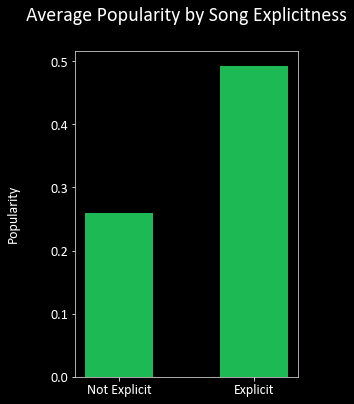

In [36]:
plt.figure(figsize=(4, 6))

ax = plt.bar(x=df.groupby('explicit').mean()['popularity'].index, height=df.groupby('explicit').mean()['popularity'], color='#1DB954', width=0.5)

plt.title("Average Popularity by Song Explicitness", color='w', fontsize=20, pad=30)
plt.ylabel("Popularity", fontsize=14, labelpad=30)
     
plt.tick_params(labelsize=14)

explicit_names = ('Not Explicit', 'Explicit')
y_pos = np.arange(len(explicit_names))
plt.xticks(y_pos, explicit_names)

plt.show()

On average, explicit songs are more popular. 

### 3.2.2 Key 

In [37]:
df['key'].value_counts()

0     20138
7     19928
2     17520
9     16651
5     15395
4     12382
1     11570
10    11320
8      9938
11     9638
6      8058
3      6796
Name: key, dtype: int64

In [38]:
key_names = ('C', 'C-sharp', 'D', 'D-sharp', 'E', 'F', 'F-sharp', 'G', 'G-sharp', 'A', 'B-flat', 'B')

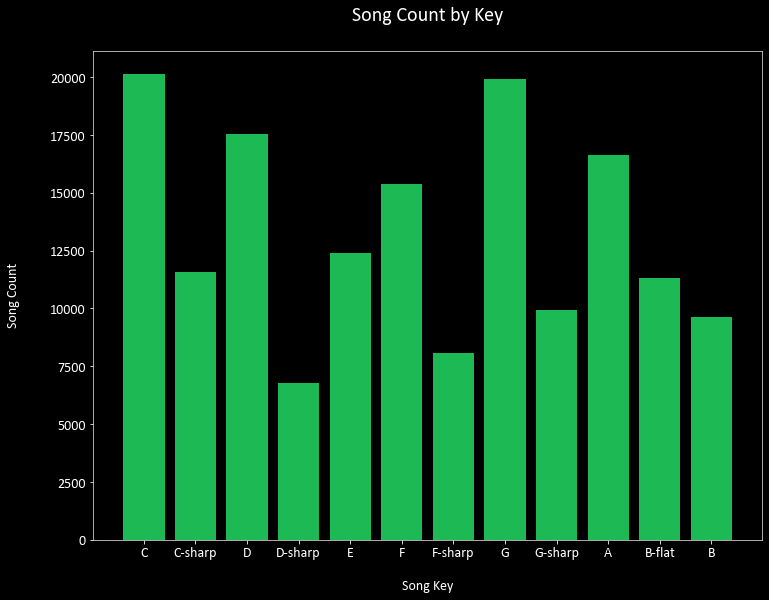

In [39]:
plt.figure(figsize=(12,9))

plt.bar(x=df['key'].value_counts().index, height=df['key'].value_counts().values, color='#1DB954')

plt.title("Song Count by Key", color='w', fontsize=20, pad=30)
plt.ylabel("Song Count", fontsize=14, labelpad=30)
plt.xlabel("Song Key", fontsize=14, labelpad=20)

y_pos = np.arange(len(key_names))
plt.xticks(y_pos, key_names)
     
plt.tick_params(labelsize=14)
plt.show()

The most common song keys are C, G, D and A. C and G are often considered the best keys for <a href="https://mixedinkey.com/captain-plugins/wiki/common-chord-progressions-pop-music/#:~:text=C%20major%20and%20G%20major,and%20scales%20for%20Pop%20music.">Pop music</a>. In addition, separate findings revealed that most Western contemporary music is based around either the piano or guitar, or both. Thus, bands who play the piano are more likely to play in the key of C (more convenient for piano), whereas those who play the guitar and piano tend to play in the key of G which is convenient for both these instruments (<a href="https://www.digitaltrends.com/music/whats-the-most-popular-music-key-spotify/">source</a>).

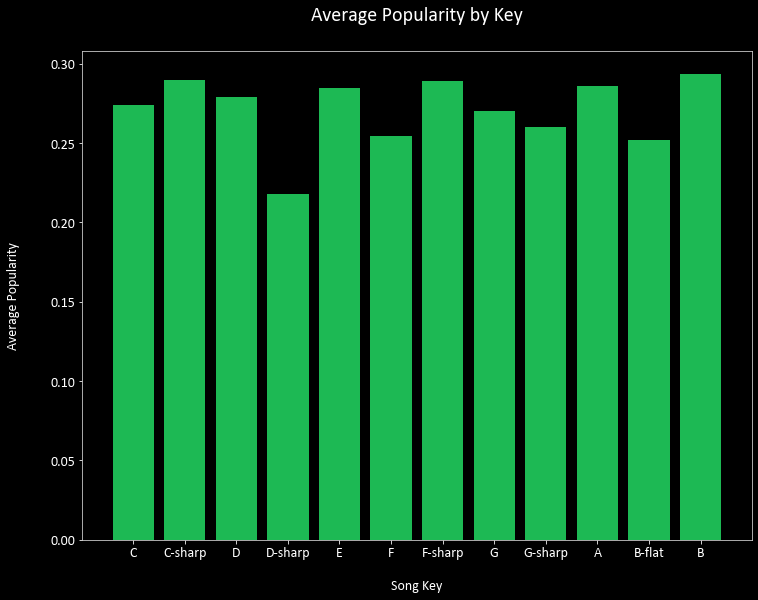

In [40]:
plt.figure(figsize=(12,9))

plt.bar(x=df.groupby('key').mean()['popularity'].index, height=df.groupby('key').mean()['popularity'].values, color='#1DB954')

plt.title("Average Popularity by Key", color='w', fontsize=20, pad=30)
plt.ylabel("Average Popularity", fontsize=14, labelpad=30)
plt.xlabel("Song Key", fontsize=14, labelpad=20)

y_pos = np.arange(len(key_names))
plt.xticks(y_pos, key_names)
     
plt.tick_params(labelsize=14)
plt.show()

The top 5 most popular keys are E, A, D, B and C. In general, we note that the range of popularity is roughly between 0.20 to 0.27, which suggests that song keys may not influence the popularity of songs much. 

### 3.2.3 Mode

In [41]:
df['mode'].value_counts()

1    112625
0     46709
Name: mode, dtype: int64

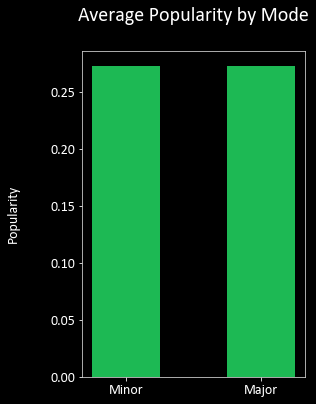

In [42]:
plt.figure(figsize=(4, 6))

ax = plt.bar(x=df.groupby('mode').mean()['popularity'].index, height=df.groupby('mode').mean()['popularity'], color='#1DB954', width=0.5)

plt.title("Average Popularity by Mode", color='w', fontsize=20, pad=30)
plt.ylabel("Popularity", fontsize=14, labelpad=30)

plt.tick_params(labelsize=14)

mode_names = ('Minor', 'Major')
y_pos = np.arange(len(mode_names))
plt.xticks(y_pos, mode_names)

plt.show()

Here we do not observe any massive differences in the popularity between songs with a major or minor modality, suggesting that songs released of either type are equally likely to be popular. 

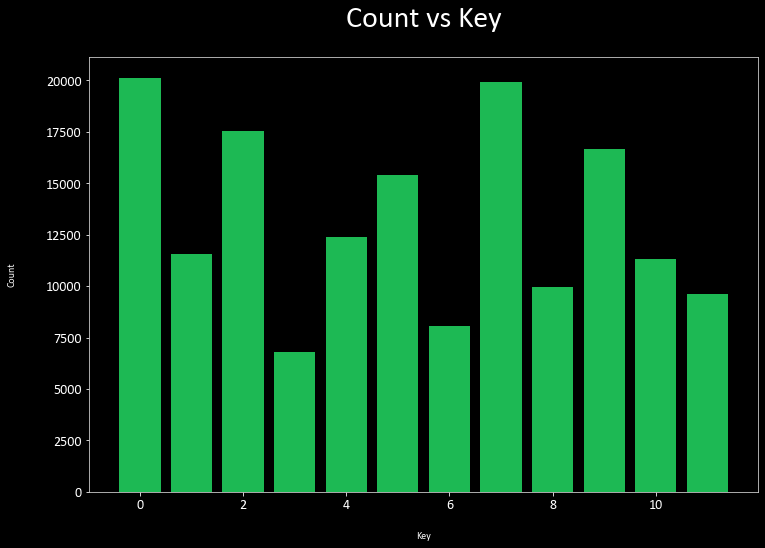

In [43]:
plt.figure(figsize=(12,8))

plt.bar(x=df['key'].value_counts().index, height=df['key'].value_counts().values, color= '#1DB954')
plt.xlabel("Key", labelpad=20)
plt.ylabel("Count", labelpad=30)
plt.tick_params(labelsize=14)

plt.title("Count vs Key", c='white', size=30, pad=30);

From the above plots and the correlation analyses conducted earlier, the features 'Key' and 'Mode' do not reveal a noticeable impact on song popularity. Thus, these features will be dropped from our dataset before the modelling process.

## 3.3 Most Popular Songs

In [44]:
df.columns

Index(['acousticness', 'artists', 'danceability', 'energy', 'explicit', 'id',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'popularity', 'speechiness', 'tempo', 'valence', 'year',
       'duration_mins'],
      dtype='object')

In [45]:
top_50_songs = df.sort_values('popularity', ascending=False,)[['artists', 'name', 'popularity']].head(50)
top_50_songs

artists  \
release_date                                                      
2021-01-08                                   ['Olivia Rodrigo']   
2020-07-24                            ['24kGoldn', 'iann dior']   
2020-10-30                                    ['Ariana Grande']   
2020-10-23                                          ['KAROL G']   
2020-10-30                         ['Bad Bunny', 'Jhay Cortez']   
2020-11-12                                    ['Billie Eilish']   
2020-11-06                                    ['The Kid LAROI']   
2020-08-20                                               ['CJ']   
2020-10-30                                    ['Ariana Grande']   
2020-11-27                             ['Bad Bunny', 'ROSALÍA']   
2020-04-17                                       ['Tate McRae']   
2020-07-03                                        ['Pop Smoke']   
2021-01-01                                    ['Justin Bieber']   
2020-11-13                                        ['Lil Nas X']   
2020-07-31                                             ['Boza']   
2020-10-16                    ['Justin Bieber', 'benny blanco']   
2020-08-07                   ['Cardi B', 'Megan Thee Stallion']   
2020-09-16                                           ['Tiësto']   
2020-12-10                              ['Myke Towers', 'Juhn']   
2020-11-20                                              ['BTS']   
2020-11-20                    ['Shawn Mendes', 'Justin Bieber']   
2020-07-03                               ['Joel Corry', 'MNEK']   
2020-12-25                                              ['SZA']   
2020-04-17                            ['DaBaby', 'Roddy Ricch']   
2020-03-20                                       ['Conan Gray']   
2019-12-13                                     ['Harry Styles']   
2020-10-08    ['Manuel Turizo', 'Rauw Alejandro', 'Myke Towe...   
2020-07-03                  ['Pop Smoke', 'Lil Baby', 'DaBaby']   
2018-11-01                                              ['Sia']   
2020-11-20                                              ['BTS']   
2020-07-24                                          ['Farruko']   
2020-09-21                                           ['Camilo']   
2020-09-04    ['Sech', 'Daddy Yankee', 'J Balvin', 'ROSALÍA'...   
2020-12-21                                       ['Ed Sheeran']   
2020-06-12                                             ['HVME']   
2020-10-16                       ['Sebastian Yatra', 'Guaynaa']   
2020-10-01                               ['Dua Lipa', 'DaBaby']   
2020-08-14    ['Internet Money', 'Gunna', 'Don Toliver', 'NAV']   
2020-09-18               ['Justin Bieber', 'Chance the Rapper']   
2019-05-17                                    ['Lewis Capaldi']   
1994-11-01                                     ['Mariah Carey']   
2020-10-30                         ['MEDUZA', 'Dermot Kennedy']   
2020-11-27                                        ['Bad Bunny']   
2020-04-24                                      ['Ritt Momney']   
2020-06-12          ['Jay Wheeler', 'DJ Nelson', 'Myke Towers']   
2013-04-19                                ['The Neighbourhood']   
2020-11-20                          ['Miley Cyrus', 'Dua Lipa']   
2020-02-08                             ['Powfu', 'beabadoobee']   
2019-12-06                                      ['Roddy Ricch']   
2019-10-17                                      ['Tones And I']   

                                                 name  popularity  
release_date                                                       
2021-01-08                            drivers license        1.00  
2020-07-24                     Mood (feat. iann dior)        0.96  
2020-10-30                                  positions        0.96  
2020-10-23                                    BICHOTA        0.95  
2020-10-30                                     DÁKITI        0.95  
2020-11-12                             Therefore I Am        0.94  
2020-11-06                 

In [46]:
# Sort songs by popularity in ascending order 
top_50_songs = top_50_songs.sort_values('popularity', ascending=True)

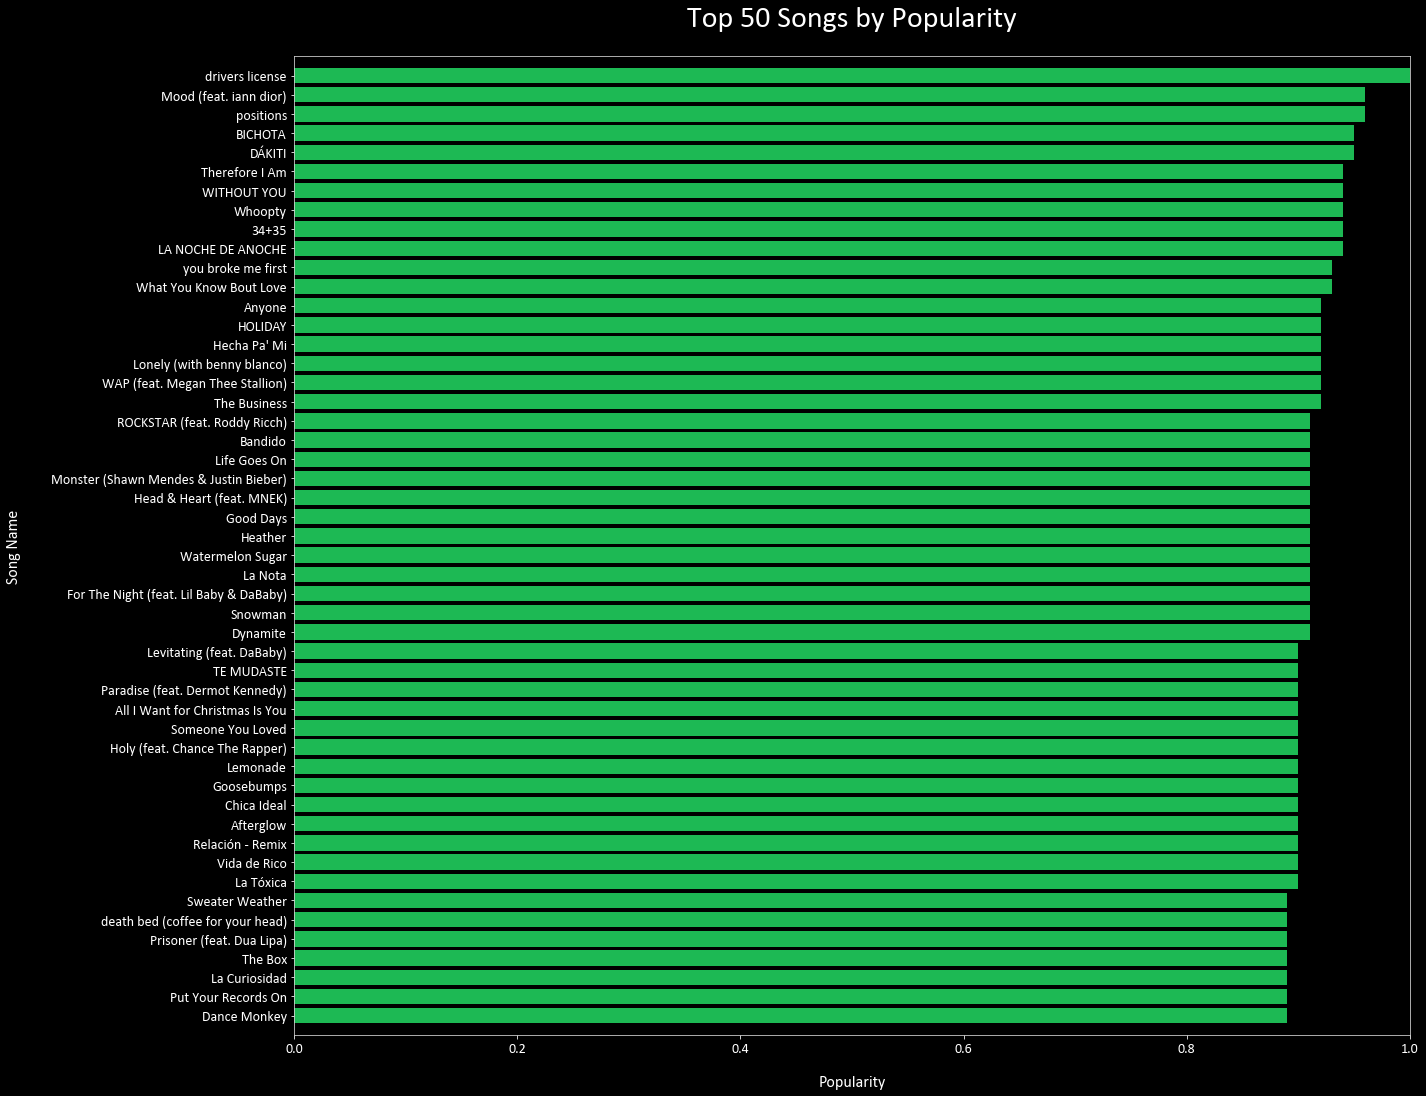

In [71]:
plt.figure(figsize=(20,18))

plt.barh(y=top_50_songs['name'], width=top_50_songs['popularity'], color= '#1DB954')
plt.xlabel("Popularity", fontsize=16, labelpad=20)
plt.ylabel("Song Name", fontsize=16, labelpad=30)
plt.tick_params(labelsize=14)

plt.ylim([-1,50])
plt.xlim([0,1])

plt.title("Top 50 Songs by Popularity", fontsize=30, c='white', pad=30);

Above are the top 50 songs by popularity. There are indeed some of the more familiar names 
- WAP 
- Monster
- All I want for Christmas is you 
- Put your records on 
- Sweater Weather 

## 3.4 Most Common Song Titles

In [48]:
song_titles = df['name'].value_counts().head(30).sort_values(ascending=True)
song_titles

Finale                                     25
Angel                                      26
99 Year Blues                              26
Hold On                                    27
Goodbye                                    27
Home                                       27
Time After Time                            28
The Little Drummer Boy                     28
The First Noel                             29
Autumn Leaves                              29
Santa Claus Is Coming To Town              30
I Love You                                 31
Stardust                                   32
Blue Christmas                             34
Hark! The Herald Angels Sing               34
Stay                                       34
Ave Maria                                  37
Happy New Year                             39
Overture                                   45
O Holy Night                               48
Summertime                                 50
Silver Bells                      

In [70]:
plt.figure(figsize=(20,14), dpi=600)

plt.barh(y=song_titles.index, width=song_titles.values, color= '#1DB954')
plt.xlabel("Song Count", fontsize=20, labelpad=10)
plt.ylabel("Song Name", fontsize=20, labelpad=10)
plt.tick_params(labelsize=20)
plt.ylim([-1,30])
plt.title("Top 30 Most Common Song Names", fontsize=24, c='white', pad=20);

Above we see the top 30 most common song titles. 

1) Although these songs have the same titles, an artist may have released multiple versions of the same song at different times of the year, either as a single, as an album, across multiple albums or with updated instrumentals. 

2) Different artists may release their own renditions of songs. This is especially true for Christmas-related songs such as 'White Christmas' where over 103 versions exist on Spotify. Reasons why artists may do this is to gain more exposure, satisfy their listeners or purely for financial reasons! Christmas albums are one of the biggest <a href="https://www.marketplace.org/2020/12/23/what-makes-christmas-music-so-lucrative/">cash cows</a> of all time, despite being relevant for 1-2 months a year. 

 A classic example of this is Mariah Carey's "All I want for Christmas is you" which is among the top 50 most popular songs. As the <a href="https://www.marketplace.org/2020/12/23/what-makes-christmas-music-so-lucrative/">performer, co-writer and co-producer of the song</a>, her festive track generates revenue for her in 3 different ways, amounting to over <a href="https://www.economist.com/graphic-detail/2017/11/30/the-music-industry-should-be-dreaming-of-a-white-christmas">USD 60 million</a> since its release in 1994. 

3) Artists may use the same title for their songs, despite them being completely different 

4) We also note that with high Nostalgic reasons

Overture is defined as <a href="https://www.britannica.com/art/overture-music">"an orchestral introduction to a musical work (often dramatic), but also an independent instrumental work."</a> Thus we see multiple artists titling their compositions as "Overture", with several notable soundtracks containing this title, eg. Halo, Beauty & the Beast, and most notably Phantom of the Opera.    



## 3.5 Most Popular Artists

In [50]:
top_50_artists = pd.DataFrame(df.artists.value_counts().sort_values(ascending=False).head(50))
top_50_artists.rename(columns={'artists': 'song_count'}, inplace=True)
top_50_artists = top_50_artists.sort_values(by='song_count', ascending=True)
top_50_artists.head()

song_count
['Billie Holiday', 'Teddy Wilson']         181
['KISS']                                   182
['Armin van Buuren']                       182
['Count Basie']                            183
['Shamshad Begum']                         183

In [69]:
plt.figure(figsize=(20,16), dpi=600)

plt.barh(y=top_50_artists.index, width=top_50_artists['song_count'].values, color= '#1DB954')
plt.xlabel("Song Count on Spotify", fontsize=20, labelpad=20)
plt.ylabel("Artists", fontsize=20, labelpad=30)
plt.tick_params(labelsize=20)
plt.ylim([-1,50])
plt.title("Artists with Most Songs (Top 50)", fontsize=30, c='white', pad=30);


The top 50 artists with the most songs consists of many artists from before the year 2000. The top 2 (Francisco Canaro, Ignacio Corsini) are South American musicians who specialise in folklore / tango / orchestral music. Meanwhile, we see many other familiar names like Frank Sinatra, Elvis Presley, The Beatles, etc, all of whom were extremely famous back in the 1960s - 1980s. 

Only 2 current artists are in this list - Taylor Swift and Armin van Buuren. 

## 3.6 Most Popular Genres

In [52]:
df_genres = pd.read_csv("../datasets/data_by_genres_cleaned.csv")
df_genres.head()

genres  acousticness  danceability    energy  \
0  21st century classical      0.754600      0.284100  0.159580   
1                   432hz      0.485515      0.312000  0.391678   
2                   8-bit      0.028900      0.673000  0.950000   
3                      []      0.535793      0.546937  0.485430   
4              a cappella      0.694276      0.516172  0.330533   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.484374  0.168580 -22.153400     0.062060   91.351000  0.143380   
1          0.477250  0.265940 -18.131267     0.071717  118.900933  0.236483   
2          0.630000  0.069000  -7.899000     0.292000  192.816000  0.997000   
3          0.278442  0.220970 -11.624754     0.101511  116.068980  0.486361   
4          0.036080  0.222983 -12.656547     0.083627  105.506031  0.454077   

   popularity  key  mode  duration_mins  
0    0.066000    4     1           5.88  
1    0.412000   11     1          17.46  
2    0.000000    5     1           2.22  
3    0.123508    7     1           4.16  
4    0.390862    7     1           3.36

In [53]:
df_genres.shape

(3232, 14)

In [65]:
df_genres.sort_values('popularity', ascending=False).head(30)

genres  acousticness  danceability    energy  \
565         chinese electropop      0.002570      0.660000  0.787000   
1768        korean mask singer      0.238000      0.658000  0.749000   
3213                      yaoi      0.006550      0.603000  0.964000   
996              dutch rap pop      0.216000      0.767000  0.643000   
2544        rochester mn indie      0.034700      0.655000  0.487000   
945                    dong-yo      0.259000      0.829000  0.886000   
44                   afroswing      0.171333      0.758333  0.512000   
1616                     j-rap      0.096100      0.648000  0.904000   
1066              estonian pop      0.285000      0.458000  0.696000   
1539                 irish pop      0.308600      0.474750  0.513625   
2057          musical advocacy      0.176500      0.563500  0.544500   
53             alberta hip hop      0.330000      0.885000  0.685000   
523      channel islands indie      0.147000      0.625000  0.763000   
2142       newcastle nsw indie      0.003920      0.498000  0.810000   
1517        instrumental grime      0.341453      0.743933  0.631533   
1345            guatemalan pop      0.622000      0.591000  0.672000   
2553               rock chapin      0.622000      0.591000  0.672000   
2896    swedish tropical house      0.022500      0.632000  0.575000   
1836                london rap      0.142567      0.698333  0.500000   
1664         japanese teen pop      0.014870      0.607667  0.899333   
1504            indonesian r&b      0.251500      0.616000  0.510000   
566            chinese hip hop      0.359000      0.409000  0.678000   
911                     dembow      0.167690      0.817400  0.723000   
2648                  scam rap      0.184608      0.829222  0.700667   
1538               irish indie      0.988000      0.521000  0.088900   
1210              future house      0.005210      0.609000  0.885000   
1105  finnish alternative rock      0.000109      0.600000  0.796000   
1261           german pop rock      0.299750      0.618400  0.551400   
1933          mexican pop punk      0.009040      0.488000  0.897000   
2649          scandinavian r&b      0.388000      0.705000  0.433000   

      instrumentalness  liveness   loudness  speechiness       tempo  \
565           0.000000  0.323000  -4.592000     0.032000  142.018000   
1768          0.000002  0.272000  -2.967000     0.063400  128.909000   
3213          0.000003  0.143000  -2.886000     0.048700  135.028000   
996           0.000104  0.080600  -5.225000     0.101000  169.990000   
2544          0.897000  0.271000  -7.988000     0.033000  139.914000   
945           0.000000  0.055900  -1.746000     0.112000  115.056000   
44            0.000033  0.101033  -7.562667     0.211000  102.061000   
1616          0.000002  0.062900  -4.565000     0.078600  121.994000   
1066          0.000000  0.123000  -4.742000     0.040200  174.141000   
1539          0.024295  0.146075  -8.183875     0.057700  111.043375   
2057          0.000017  0.086850 -11.095500     0.039900   93.996000   
53            0.000000  0.148000  -6.429000     0.062700   99.954000   
523           0.010600  0.214000  -4.997000     0.129000   88.753000   
2142          0.007170  0.063500  -4.065000     0.026300   79.935000   
1517          0.010906  0.098587  -6.415400     0.153467  124.013600   
1345          0.000000  0.112000  -3.515000     0.037500  139.939000   
2553          0.000000  0.112000  -3.515000     0.037500  139.939000   
2896          0.000002  0.104000  -6.478000     0.029000   90.037000   
1836          0.000000  0.093700  -7.315667     0.198000  111.078667   
1664          0.000006  0.193833  -3.653667     0.051467  127.378667   
1504          0.000000  0.087400  -7.639500     0.165450  158.781500   
566           0.000005  0.167000  -7.731000     0.087800   89.968000   
911           0.001166  0.104500  -5.758000     0.148310  111.267600   
2648          0.000031  0.100042  -4.523389     0.282722  121.6

In [60]:
plt.figure(figsize=(20,14), dpi=600)

plt.barh(y=df_genres.sort_values('popularity')['genres'].tail(30), width=df_genres.sort_values('popularity')['popularity'].tail(30), color= '#1DB954')
plt.xlabel("Popularity", fontsize=22, labelpad=20)
plt.ylabel("Genres", fontsize=22, labelpad=20)
plt.tick_params(labelsize=20)

plt.ylim([-1,30])
plt.title("Top 30 Genres", fontsize=30, c='white', pad=30);

The top 30 genres are an amalgation of sub-genres, eg. Chinese electropop, Irish pop, Guatemalan pop, London pop, etc. We observe that the most popular genres in the top 30 are pop (7 counts) and indie (4 counts). This is likely a sign of shifting music preferences to variations of pop and indie songs.